# Business Understanding

## Objective
The primary objective of this project is to [your objective, e.g., "predict customer churn", "classify fraudulent transactions", or "analyze factors influencing house prices"].

## Key Business Questions
- What are the main factors contributing to [objective]?
- How accurately can we [predict/classify] using available data?
- What are the cost implications of false positives and false negatives?

## Success Criteria
- Quantitative: Achieve a minimum accuracy/AUC score of X%.
- Qualitative: Provide insights into the top predictors for decision-making.

## Constraints
- Data must comply with privacy regulations (e.g., GDPR).
- Project must be completed within X weeks.


# Data Understanding

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load training and testing datasets
train_df = pd.read_csv('fraudtrain.csv')
test_df = pd.read_csv('fraudtest.csv')

# Quick overview of the datasets
print(train_df.info())
print(test_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [3]:
# Check for missing values in train and test
print(train_df.isnull().sum())
print(test_df.isnull().sum())


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat            

In [4]:
# Convert date columns to datetime format
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])

# Confirm numeric columns are correctly typed
print(train_df.dtypes)


Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object


In [5]:
# Extract time-based features
for df in [train_df, test_df]:
    df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
    df['transaction_day'] = df['trans_date_trans_time'].dt.day
    df['transaction_month'] = df['trans_date_trans_time'].dt.month
    df['transaction_weekday'] = df['trans_date_trans_time'].dt.weekday
    
    # Calculate age
    df['dob'] = pd.to_datetime(df['dob'])
    df['age'] = (pd.to_datetime('today') - df['dob']).dt.days // 365


In [6]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,transaction_day,transaction_month,transaction_weekday,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1,1,36
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1,1,46
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1,1,62
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1,1,57
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1,1,38


In [7]:
# Check unique values in gender and category
print("Unique values in 'gender':", train_df['gender'].unique())
print("Unique values in 'category':", train_df['category'].unique())


Unique values in 'gender': ['F' 'M']
Unique values in 'category': ['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']


In [8]:
# Encode gender as binary and one-hot encode category
for df in [train_df, test_df]:
    # Map 'gender' column to binary values
    df['gender'] = df['gender'].map({'M': 1, 'F': 0})
    
    # One-hot encode 'category' and drop the first column to avoid multicollinearity
    category_encoded = pd.get_dummies(df['category'], prefix='category', drop_first=True)
    df.drop('category', axis=1, inplace=True)  # Drop the original 'category' column
    df = pd.concat([df, category_encoded], axis=1)




In [9]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,transaction_day,transaction_month,transaction_weekday,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,0,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1,1,36
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1,1,46
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,Edward,Sanchez,1,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1,1,62
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1,1,57
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,Tyler,Garcia,1,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1,1,38


In [10]:
# Drop irrelevant columns
cols_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'zip', 'job']
train_df.drop(cols_to_drop, axis=1, inplace=True)
test_df.drop(cols_to_drop, axis=1, inplace=True)


In [11]:
train_df.head()

,trans_date_trans_time,merchant,amt,gender,state,lat,long,city_pop,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,transaction_day,transaction_month,transaction_weekday,age
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",4.97,0,NC,36.0788,-81.1781,3495,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1,1,36
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",107.23,0,WA,48.8878,-118.2105,149,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1,1,46
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,220.11,1,ID,42.1808,-112.2620,4154,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1,1,62
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",45.00,1,MT,46.2306,-112.1138,1939,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1,1,57
4,2019-01-01 00:03:06,fraud_Keeling-Crist,41.96,1,VA,38.4207,-79.4629,99,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1,1,38


In [12]:
# Check column consistency
print(set(train_df.columns) == set(test_df.columns))


True



## Dataset Overview
- The dataset contains X rows and Y columns.
- Key columns include:
  - **Feature1**: Description
  - **Feature2**: Description
  - **Target**: Target variable.

## Data Quality Assessment
- **Missing Values**: X% of rows contain missing values.
- **Class Balance**: The target variable is imbalanced/balanced.

## Key Observations
- Summary statistics highlight [insights, e.g., "skewed distribution in Feature1"].
- Visualizations reveal [patterns, e.g., "missing data concentrated in Feature3"].


## Data Preparation

# EDA

In [13]:
# Check basic dataset information
print("Train Dataset Info:")
train_df.info()
print("\nTest Dataset Info:")
test_df.info()

# Summary statistics for numeric columns
print("\nTrain Numeric Summary:")
print(train_df.describe())

print("\nTest Numeric Summary:")
print(test_df.describe())

# Check for missing values
print("\nMissing Values (Train):")
print(train_df.isnull().sum())

print("\nMissing Values (Test):")
print(test_df.isnull().sum())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   merchant               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  int64         
 4   state                  1296675 non-null  object        
 5   lat                    1296675 non-null  float64       
 6   long                   1296675 non-null  float64       
 7   city_pop               1296675 non-null  int64         
 8   dob                    1296675 non-null  datetime64[ns]
 9   trans_num              1296675 non-null  object        
 10  unix_time              1296675 non-null  int64         
 11  merch_lat              1296675 non-null  float64       
 12  merch_lo


Fraud Distribution in Train:
0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

Fraud Distribution in Test:
0    0.99614
1    0.00386
Name: is_fraud, dtype: float64


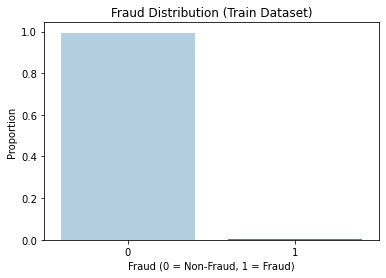

In [14]:
# Fraud distribution in train and test sets
train_fraud_dist = train_df['is_fraud'].value_counts(normalize=True)
test_fraud_dist = test_df['is_fraud'].value_counts(normalize=True) if 'is_fraud' in test_df else None

print("\nFraud Distribution in Train:")
print(train_fraud_dist)

if test_fraud_dist is not None:
    print("\nFraud Distribution in Test:")
    print(test_fraud_dist)

# Visualize fraud distribution
sns.barplot(x=train_fraud_dist.index, y=train_fraud_dist.values, palette="Blues")
plt.title("Fraud Distribution (Train Dataset)")
plt.xlabel("Fraud (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Proportion")
plt.show()


This Identifies potential class imbalance, critical for fraud detection tasks.
The Data is highly unbalanced

### Transaction Amount vs. Fraud

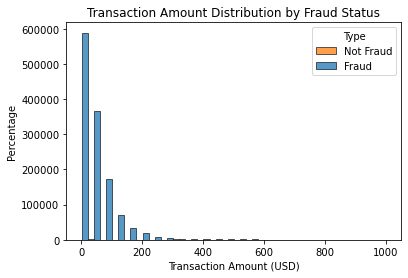

In [15]:
# Transaction amount distribution
sns.histplot(data=train_df[train_df['amt'] <= 1000], x='amt', hue='is_fraud', 
             multiple='dodge', common_norm=False, bins=25)
plt.xlabel('Transaction Amount (USD)')
plt.ylabel('Percentage')
plt.title('Transaction Amount Distribution by Fraud Status')
plt.legend(title='Type', labels=['Not Fraud', 'Fraud'])
plt.show()


Gender Vs. Fraud

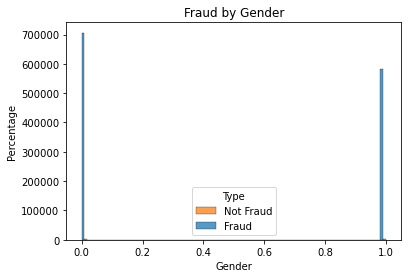

In [16]:
# Gender distribution by fraud status
sns.histplot(data=train_df, x='gender', hue='is_fraud', 
             multiple='dodge', common_norm=False)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Fraud by Gender')
plt.legend(title='Type', labels=['Not Fraud', 'Fraud'])
plt.show()


Age vs. Fraud

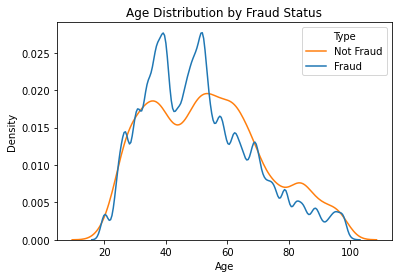

In [17]:
# Calculate age
from datetime import date
train_df['age'] = date.today().year - pd.to_datetime(train_df['dob']).dt.year

# Age distribution by fraud status
sns.kdeplot(data=train_df, x='age', hue='is_fraud', common_norm=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Fraud Status')
plt.legend(title='Type', labels=['Not Fraud', 'Fraud'])
plt.show()


Hourly Trend

ValueError: `stat` must be one of ['count', 'density', 'probability', 'frequency'], but percent was passed.`

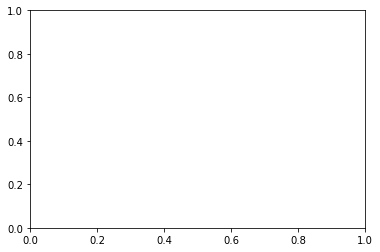

In [18]:
# Extract transaction hour
train_df['hour'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.hour

# Hourly distribution by fraud status
sns.histplot(data=train_df, x='hour', hue='is_fraud', 
             common_norm=False, stat='percent', multiple='dodge', bins=24)
plt.xlabel('Hour of Day')
plt.ylabel('Percentage')
plt.title('Fraud by Hour of Day')
plt.show()


Weekly Trend 

Monthly Trend